In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [4]:
image_path = '../output_videos/cropped_img.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

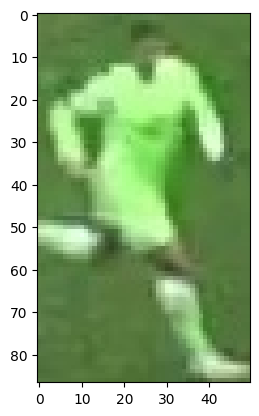

In [5]:
plt.imshow(image)
plt.show()

# Take the top half of the image

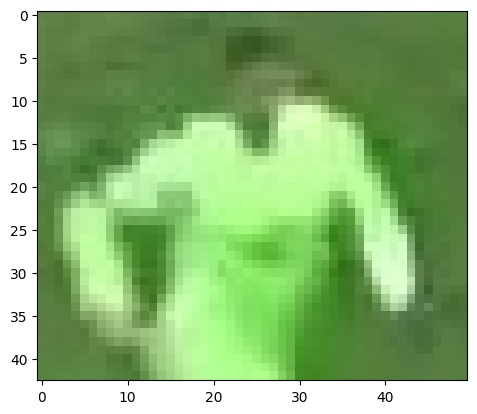

In [6]:
top_half_image = image [0:int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

# Cluster the image into two cluster

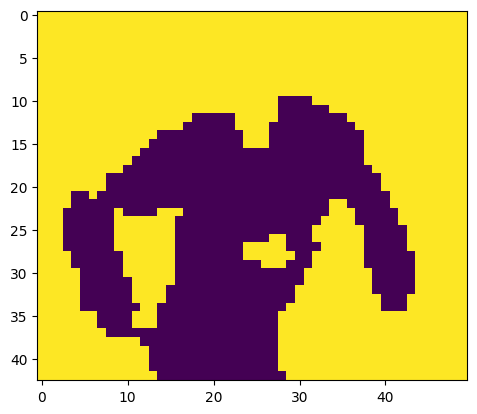

In [10]:
# Reshape the image into a 2d array
image_2d = top_half_image.reshape(-1,3)
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

# Get the cluster labels
labels = kmeans.labels_

# Reshape the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

#Display clustered image
plt.imshow(clustered_image)
plt.show()

In [11]:
corner_clusters = [clustered_image[0,0] , clustered_image[0,-1], clustered_image [-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key = corner_clusters.count)
print(non_player_cluster)

1


In [12]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [13]:
kmeans.cluster_centers_[player_cluster]

array([171.29634641, 235.59269283, 142.84573748])